In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class MatrixFactorization:
    def __init__(self, r, k, iters=1000, alpha=0.01, beta=0.01):
        self.r = r
        self.m, self.u = self.r.shape
        self.e = np.zeros((self.m, self.u))
        self.k = k
        self.iters = iters
        self.alpha = alpha
        self.beta = beta
        self.loss = []

    def fit(self):
        self.p = np.random.rand(self.m, self.k)
        self.q = np.random.rand(self.u, self.k)
        self.bias_p = np.zeros(self.m)
        self.bias_q = np.zeros(self.u)
        self.b = np.mean(self.r[np.where(self.r != None)])
        for n in range(self.iters):
            self.r1 = np.dot(self.p, self.q.T) + self.b + np.array([[i]*len(self.bias_p) for i in self.bias_p]) + np.array([[i]*len(self.bias_q) for i in self.bias_q]).T
            pairs = []
            for i in range(self.m):
                for j in range(self.u):
                    if self.r[i][j] != None:
                        self.e[i][j] = self.r[i][j]-self.r1[i][j]
                        pairs.append((i, j))
            np.random.shuffle(pairs)
            for i, j in pairs:
                self.p[i][:] += self.alpha * (2*self.e[i][j]*self.q[j][:]-self.beta*self.p[i][:])
                self.q[j][:] += self.alpha * (2*self.e[i][j]*self.p[i][:]-self.beta*self.q[j][:])
                self.bias_p[i] += self.alpha * (self.e[i][j] - self.beta * self.bias_p[i])
                self.bias_q[j] += self.alpha * (self.e[i][j] - self.beta * self.bias_q[j])
            self.loss.append(np.sqrt(np.sum(self.e**2)))

    def predict(self):
        return np.dot(self.p, self.q.T) + self.b + np.array([[i]*len(self.bias_p) for i in self.bias_p]) + np.array([[i]*len(self.bias_q) for i in self.bias_q]).T

    def fit_predict(self):
        self.fit()
        return self.predict()

    def return_loss(self):
        return self.loss

    def return_mse_loss(self):
        return np.sqrt(np.sum(self.e**2))

0.003662374664226401


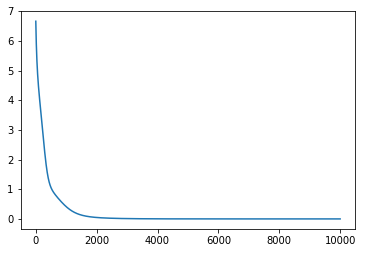

In [3]:
r = np.array([[4, 2, None, 1, 5], [3, 4, 4, 2, None], [1, None, 5, 4, 5], [None, 3, 3, 3, 4], [2, 5, 5, None, 3]])
mf = MatrixFactorization(r, k=3, iters=10000, alpha=0.001, beta=0.001)
mf.fit_predict()
print(mf.return_mse_loss())
plt.plot(mf.return_loss())